# Inicialização

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Testando o Geopandas

In [2]:
rj = gpd.read_file("dados/RJ_Municipios_2022.shp")
rj

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3300100,Angra dos Reis,RJ,813.420,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633..."
1,3300159,Aperibé,RJ,94.542,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6..."
2,3300209,Araruama,RJ,638.276,"POLYGON ((-42.28399 -22.93928, -42.28444 -22.9..."
3,3300225,Areal,RJ,110.724,"POLYGON ((-43.09004 -22.23844, -43.09135 -22.2..."
4,3300233,Armação dos Búzios,RJ,70.977,"MULTIPOLYGON (((-41.91872 -22.77162, -41.91854..."
...,...,...,...,...,...
87,3306008,Três Rios,RJ,322.843,"POLYGON ((-43.23685 -22.13806, -43.23831 -22.1..."
88,3306107,Valença,RJ,1300.767,"POLYGON ((-43.7294 -22.09312, -43.72927 -22.09..."
89,3306156,Varre-Sai,RJ,201.938,"POLYGON ((-41.89492 -20.97015, -41.8949 -20.96..."
90,3306206,Vassouras,RJ,536.073,"POLYGON ((-43.66409 -22.45808, -43.67771 -22.4..."


<Axes: >

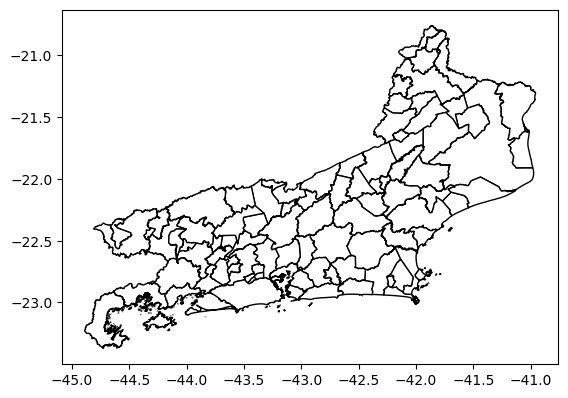

In [3]:
rj.plot(color = "white", edgecolor = "black")

<Axes: >

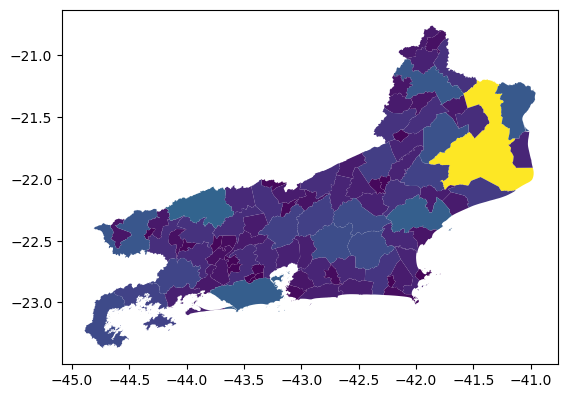

In [4]:
rj.plot(column = "AREA_KM2")

<Axes: >

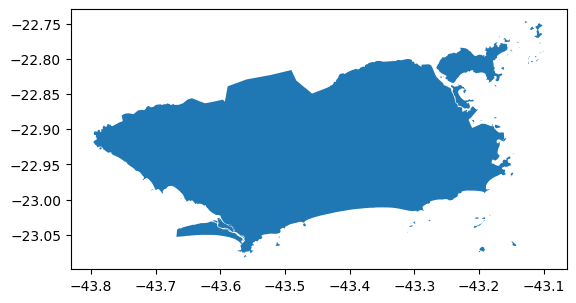

In [5]:
rj.query("NM_MUN == 'Rio de Janeiro'").plot()

In [6]:
rj.query("NM_MUN == 'Rio de Janeiro'").to_file("dados_criados/RJ-MUNIC.shp")

In [7]:
rj_munic = gpd.read_file("dados_criados/RJ-MUNIC.shp")
rj_munic

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((-43.66048 -22.99958, -43.6605 ..."


# Importando os dados

In [8]:
df = pd.read_csv("dados/dados.csv", sep = "\t")
df.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000


In [9]:
list( zip(df["Longitude"], df["Latitude"]) )[:5]

[(-43.4629464, -23.0164552),
 (-43.3369111, -22.9431995),
 (-43.300517, -22.873849),
 (-43.4127033, -22.9847874),
 (-51.92528, -14.235004)]

In [10]:
from shapely import Point

In [11]:
pontos_geometricos = list( Point(x) for x in zip(df["Longitude"], df["Latitude"]) )
pontos_geometricos[:5]

[<POINT (-43.463 -23.016)>,
 <POINT (-43.337 -22.943)>,
 <POINT (-43.301 -22.874)>,
 <POINT (-43.413 -22.985)>,
 <POINT (-51.925 -14.235)>]

In [12]:
crs = { "proj": "latlong", "ellps": "WGS84", "datum": "WGS84", "no_defs": True }
geo_dados = gpd.GeoDataFrame(df, crs = crs, geometry = pontos_geometricos)
geo_dados.head()

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor,geometry
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000,POINT (-43.46295 -23.01646)
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000,POINT (-43.33691 -22.9432)
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000,POINT (-43.30052 -22.87385)
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000,POINT (-43.4127 -22.98479)
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000,POINT (-51.92528 -14.235)


In [13]:
geo_dados.to_file("dados_criados/DATASET.shp")

<Axes: >

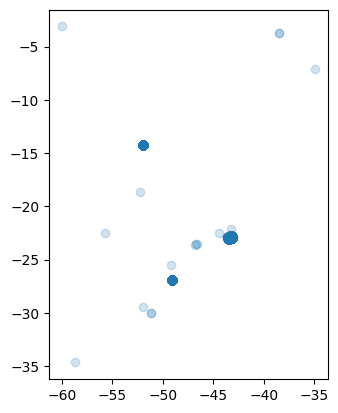

In [14]:
geo_dados.plot(alpha = 0.2)

In [15]:
rj.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [16]:
geo_dados.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datum=WGS84 +no_defs + ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# 